# Mod 1 - Housing Data Project

### Importing data

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()
#previewing data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data Cleaning

#### Checking datatypes for variables

In [2]:
df.info()
#checking datatypes
#date and sqft_basement columns need reformatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


##### Converting date column to datetime object

In [3]:
df.date = pd.to_datetime(df['date'], format = '%m/%d/%Y')

##### Converting sqft_basement to integer

In [4]:
pd.DataFrame(df.sqft_basement.value_counts()).head()
#checking for unusual values

,sqft_basement
0.0,12826
?,454
600.0,217
500.0,209
700.0,208


In [5]:
((len(df.loc[df.sqft_basement == '?']) / df.shape[0])) * 100 
#checking proportion of sqft_basement equal to ?
#small but not negligible so needs to be replaced

2.1021438162707784

In [6]:
unknown_base = df.loc[df.sqft_basement == '?', ['sqft_living']].mean()[0]
zero_base = df.loc[df.sqft_basement == '0.0', ['sqft_living']].mean()[0]
non_zero_base = df.loc[(df.sqft_basement != '0.0') & (df.sqft_basement != '?') , ['sqft_living']].mean()[0]
print('?: {}, zero: {}, non-zero: {}'.format(unknown_base, zero_base, non_zero_base))
#sqft_basement should be strongly correlated with sqft_living
#check if zero is a suitable replacement
#mean sqft_living values are similar for ? and zero sqft basement values so suitable replacement

?: 2052.431718061674, zero: 1929.953609854982, non-zero: 2313.7335577732356


In [7]:
df.loc[df.sqft_basement == '?', ['sqft_basement']] = '0.0'
#replacing ? values with zero

In [8]:
df.sqft_basement = df.sqft_basement.astype('float64').astype('int64')
#converting sqft_basement column to integer format

#### Checking for missing values

In [9]:
missing_values = pd.DataFrame(df.isna().sum())
missing_values.loc[missing_values[0] > 0].sort_values(by = 0, ascending = False)
#large number of missing values for yr_renovated and waterfront columns
#small number of missing values for view column

,0
yr_renovated,3842
waterfront,2376
view,63


##### Dealing with missing waterfront values

In [10]:
water_corr = pd.DataFrame(df.drop(labels = ['price'], axis = 1).corr().waterfront)
water_corr.sort_values(by = 'waterfront', ascending = False).head()
#checking for correlations with other predictors
#waterfront is most strongly correlated with view 

,waterfront
waterfront,1.000000
view,0.406654
sqft_living,0.110230
sqft_living15,0.088860
sqft_basement,0.088213


In [11]:
null_water = df.loc[df.waterfront.isnull(), ['view']].mean()[0]
zero_water = df.loc[df.waterfront == 0, ['view']].mean()[0]
non_zero_water = df.loc[df.waterfront > 0, ['view']].mean()[0]
print('null: {}, zero: {}, non-zero: {}'.format(null_water, zero_water, non_zero_water))
#mean view values similar for null and zero waterfront values so suitable replacement

null: 0.25654008438818565, zero: 0.20395394079604606, non-zero: 3.786206896551724


In [12]:
df.waterfront.fillna(0, inplace = True)
#replacing missing waterfront values with zero

In [13]:
df.waterfront.isna().sum()
#checking if missing waterfront values replaced

0

##### Dealing with missing year renovated values

In [14]:
renovated_corr = pd.DataFrame(df.drop(labels = ['price'], axis = 1).corr().yr_renovated)
renovated_corr.sort_values(by = 'yr_renovated', ascending = False).head()
#checking for correlations with other predictors
#no strong correlations

,yr_renovated
yr_renovated,1.000000
view,0.100964
waterfront,0.081397
sqft_basement,0.071190
zipcode,0.069846


In [15]:
pd.DataFrame(df.yr_renovated.value_counts(normalize=True)).head()
#checking for common yr_renovated values
#a large proportion of values are zero so replace

,yr_renovated
0.0,0.958096
2014.0,0.004112
2003.0,0.001746
2013.0,0.001746
2007.0,0.001690


In [16]:
df.yr_renovated.fillna(0, inplace = True)
#replacing missing yr_renovated values with zero

In [17]:
df.yr_renovated.isna().sum()
#checking if missing yr_renovated values replaced

0

##### Dealing with missing view values

In [18]:
len(df.loc[df.view.isnull()])/df.shape[0] * 100 
#checking proportion of missing view values
#negligible proportion so reasonable to remove

0.29170718155299347

In [19]:
df.drop(labels = df.loc[df.view.isnull()].index, axis = 0, inplace = True)
#removing missing view values

In [20]:
df.view.isna().sum() 
#checking if missing view values removed

0

#### Checking for outliers

In [21]:
df.describe() 
#inspecting aggregregte statistics for each column
#appears to be unusually high values for bedroom, bathroom, sqft_lot and sqft_lot15 columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Dealing with bedroom outliers

In [22]:
pd.DataFrame(df[['bedrooms']]).sort_values(by = 'bedrooms', ascending= False).head()
#top value considerably larger than rest

,bedrooms
15856,33
8748,11
19239,10
15147,10
13301,10


In [23]:
df.drop(labels = df.loc[df.bedrooms == df.bedrooms.max()].index, axis = 0, inplace=True)
#removing top bedroom value

##### Dealing with bathroom outliers

In [24]:
pd.DataFrame(df[['bathrooms']]).sort_values(by = 'bathrooms', ascending= False).head(10)
#large number of values around 8 so not necessary to remove

,bathrooms
12764,8.00
7245,8.00
9245,7.75
8537,7.50
8085,6.75
4020,6.75
20562,6.50
21490,6.50
14542,6.25
18288,6.25


##### Dealing with sqft_lot outliers

In [25]:
pd.DataFrame(df[['sqft_lot']]).sort_values(by = 'sqft_lot', ascending= False).head()
#top value considerably larger than rest

,sqft_lot
1717,1651359
17305,1164794
7640,1074218
7762,1024068
3945,982998


In [26]:
df.drop(labels = df.loc[df.sqft_lot == df.sqft_lot.max()].index, axis = 0, inplace=True)
#removing top sqft_lot value

##### Dealing with sqft_lot15 outliers

In [27]:
pd.DataFrame(df[['sqft_lot15']]).sort_values(by = 'sqft_lot15', ascending= False).head(10)
#top three values are considerably larger than rest

,sqft_lot15
9705,871200
20436,858132
13451,560617
8655,438213
3797,434728
19141,422967
6685,411962
15606,392040
21415,392040
17645,386812


In [28]:
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
#removing top three sqft_lot values

### Exploratory Data Analysis

#### What are the characteristics of cheap, average and  expensive houses?

##### Does location have an impact on price?

In [29]:
mean_zipcodes = df.groupby(by = 'zipcode')[['lat','long', 'price']].mean()
mean_zipcodes.head()
#calculating the mean latitude, longitude and price for each zipcode

,lat,long,price
zipcode,,,
98001,47.309119,-122.270713,2.808812e+05
98002,47.308780,-122.213357,2.342840e+05
98003,47.315741,-122.310054,2.941113e+05
98004,47.616227,-122.205190,1.358522e+06
98005,47.611532,-122.167268,8.102897e+05


In [30]:
mean_prices_aggregates = pd.DataFrame(mean_zipcodes.price.describe()).reset_index()
mean_prices_lower = float(mean_prices_aggregates.loc[mean_prices_aggregates['index'] == '25%', ['price']]['price'])
mean_prices_upper = float(mean_prices_aggregates.loc[mean_prices_aggregates['index'] == '75%', ['price']]['price'])
#calculating upper and lower quartiles for mean prices
mean_zipcodes['price_band'] = mean_zipcodes.price.apply(lambda x: 'cheap' if x < mean_prices_lower else ('expensive' if x > mean_prices_upper else 'average'))
mean_zipcodes.head()
#grouping zipcodes into mean price bands

,lat,long,price,price_band
zipcode,,,,
98001,47.309119,-122.270713,2.808812e+05,cheap
98002,47.308780,-122.213357,2.342840e+05,cheap
98003,47.315741,-122.310054,2.941113e+05,cheap
98004,47.616227,-122.205190,1.358522e+06,expensive
98005,47.611532,-122.167268,8.102897e+05,expensive


In [31]:
import folium

map_centre = [float(mean_zipcodes.lat.mean()), float(mean_zipcodes.long.mean())]
map_background = folium.Map(location = map_centre, zoom_start = 9)
folium.TileLayer('cartodbpositron').add_to(map_background)

for zipcode, row in mean_zipcodes.iterrows():
    if row['price_band'] == 'cheap':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'green').add_to(map_background) 
    if row['price_band'] == 'average':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'yellow').add_to(map_background)
    if row['price_band'] == 'expensive':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'red').add_to(map_background)
map_background

#plotting zipcodes on a map, colour coded by price band
#appears that zipcodes in extreme price bands are typically close to each other geographically

##### Does living density have an impact on price

We have chosen to characterise the density of the houses using the coeficient of occupancy (i.e. the amount of living space per unit lot area).

Our initial expectation is that houses with a greater density will have a lower price on average. This is because we assume that the quality of the build has been comprised to optimise living space in order to address housing shortages.

In [32]:
df['occupancy_coef'] = df['sqft_living'] / df['sqft_lot']
#creating a new column for occupancy coefficient
df['price_band'] = df.price.apply(lambda x: 'cheap' if x < mean_prices_lower else ('expensive' if x > mean_prices_upper else 'average'))
density_df = df[['occupancy_coef', 'price_band']]
density_df = density_df.loc[df['occupancy_coef'] < 1]
density_df.head()

,occupancy_coef,price_band
0,0.208850,cheap
1,0.354874,average
2,0.077000,cheap
3,0.392000,average
4,0.207921,average


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.boxplot(x='price_band', y='occupancy_coef', data=density_df, order = ['cheap', 'average', 'expensive'])

After plotting the distributions of the occupancy coefficients for each price band we observe that the density appears to increase as the price increases. This is contray to our initial expectations. This could be attributed to fact that the lot areas tend to be larger for more expensive houses so they are likely to have larger gardens despite using a larger proportion of the lot for living space.

We also observe that the variance in the occupancy coefficient increases as the price increases. This suggests that the owners of more expensive houses have more scope to decide how to use their lot space.

##### Does renovation have an impact on the price of a house?

Our initial expectation is that houses that have been renovated will tend to be more expensive than those without. It is important for this comparison to be valid that some defining characteristics of the houses have been kept the same. In this case we have decided to keep the number of bedrooms constant.

In [34]:
df['renovated'] = df.yr_renovated.map(lambda x: 0 if x == 0 else 1) 
#creating a new column that distinguishes between houses that have been renovated and those without.

In [35]:
df['bedrooms'].value_counts()
#looking for the most common value for the number of bedrooms

3     9790
4     6862
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [36]:
df.loc[df['bedrooms'] == 3].renovated.value_counts()
#comparing the number of renovated houses against those without
#considerable difference so will take an equal sized sample from non-renovated houses

0    9489
1     301
Name: renovated, dtype: int64

In [37]:
non_renovated_three_bed = df.loc[(df['bedrooms'] == 3) & (df['renovated'] == 1)]
renovated_three_bed = df.loc[(df['bedrooms'] == 3) & (df['renovated'] == 0)].sample(n = 301, random_state = 1)
three_bed_merged = pd.concat([non_renovated_three_bed, renovated_three_bed])
three_bed_merged['renovated'].value_counts()

1    301
0    301
Name: renovated, dtype: int64

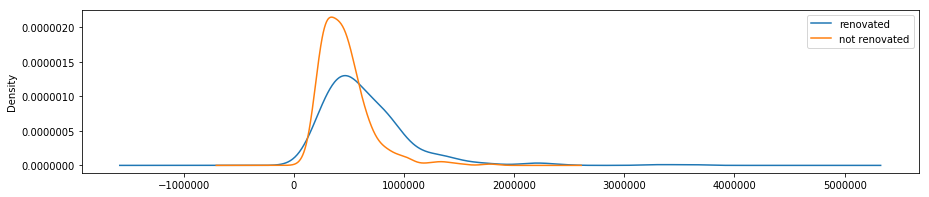

In [38]:
plt.figure(figsize=(15,3))
three_bed_merged[three_bed_merged.renovated==1]['price'].plot.kde(label = 'renovated', legend = True)
three_bed_merged[three_bed_merged.renovated==0]['price'].plot.kde(label = 'not renovated', legend = True)
plt.legend()

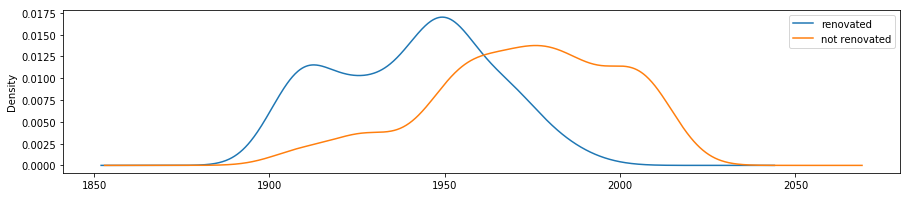

In [39]:
plt.figure(figsize=(15,3))
three_bed_merged[three_bed_merged.renovated==1]['yr_built'].plot.kde(label = 'renovated', legend = True)
three_bed_merged[three_bed_merged.renovated==0]['yr_built'].plot.kde(label = 'not renovated', legend = True)
plt.legend()

### Modelling

#### General model

Creating a linear model using the entire dataset

##### Transforming price to ensure normality in response

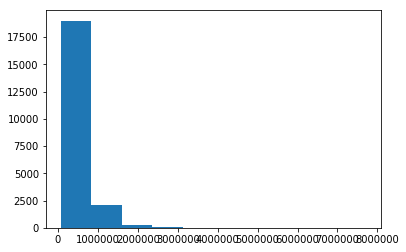

In [40]:
plt.hist(df['price']);
#response has a strong postive skew
#apply log transformation to improve normality

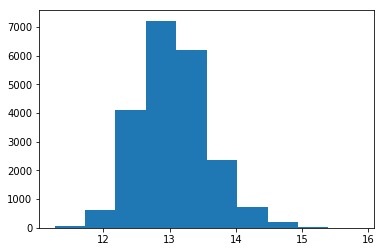

In [41]:
df['log_price'] = df['price'].map(lambda x: np.log(x))
plt.hist(df['log_price']);
#transformation has improved normality in response

In [42]:
df['log_price'] = (df['log_price'] - df['log_price'].min()) / (df['log_price'].max() - df['log_price'].min())
#scaling log_price using min-max scaling

##### Adding first predictor to model

In [43]:
df_model = df.drop(labels = ['id'], axis = 1)

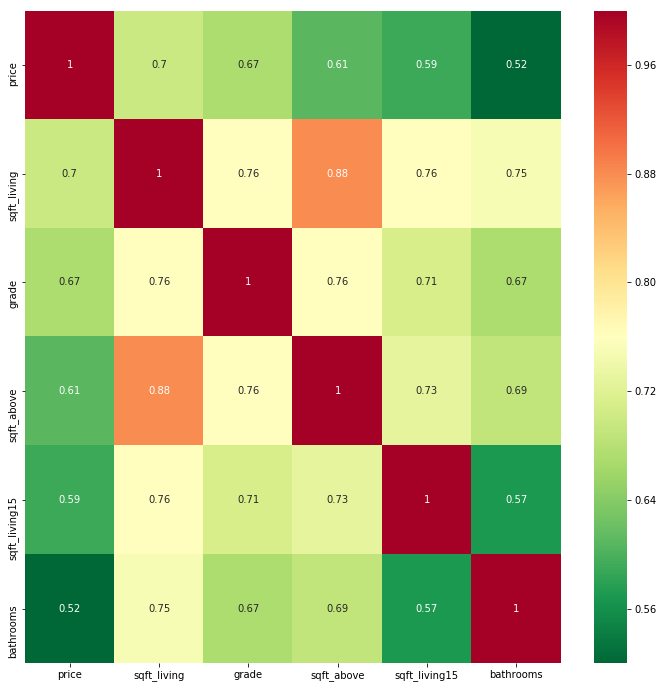

In [44]:
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(round(df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']].corr(), 2), annot = True, cmap='RdYlGn_r')
#inspecting correlations with reponse and any colinearity between predictors
#predictors appear to be highly correlated with each other

In [45]:
df_model = df.drop(labels = ['price'], axis = 1)
pd.DataFrame(df_model.corr().log_price).sort_values(by = 'log_price', ascending = False).head(5)
#grade has the greatest correlation with price

,log_price
log_price,1.000000
grade,0.703408
sqft_living,0.694820
sqft_living15,0.619096
sqft_above,0.601414


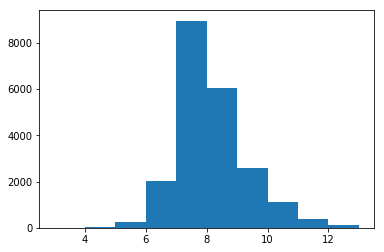

In [46]:
plt.hist(df['grade']);
#grade is discrete and normally distributed

In [47]:
df['scaled_grade'] = (df['grade'] - df['grade'].min()) / (df['grade'].max() - df['grade'].min())
df_model['scaled_grade'] = df['scaled_grade']
df_model = df_model.drop(labels = ['grade'], axis = 1)
#scaling grade using min-max scaling

In [48]:
import statsmodels.api as sm
model_1 = sm.OLS(df['log_price'], df['scaled_grade']).fit()
model_1.summary()
#adding grade to linear model
#R^2 = 0.952
#coefficent is significant
#model is valid so move onto next iteration

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 4.892e+05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:06:36   Log-Likelihood:                 23002.
No. Observations:               21529   AIC:                        -4.600e+04
Df Residuals:                   21528   BIC:                        -4.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
scaled_grade     0.8252      0.001    699.442      0.000       0.823       0.827
==============================================================================
Omnibus:                      109.929   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.526
Skew:                           0.174   Prob(JB):                     6.06e-25
Kurtosis:                       3.056   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

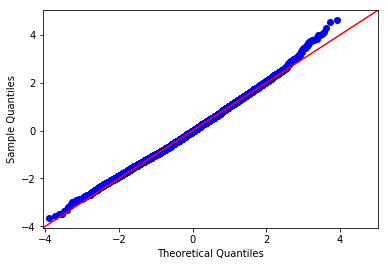

In [49]:
sm.graphics.qqplot(model_1.resid, line = '45', fit = True);
#checking distribution of residuals
#normality assumption satisfied

##### Adding second predictor to model

In [50]:
grade_corr = pd.DataFrame(df_model.corr().scaled_grade)
grade_corr.loc[grade_corr.scaled_grade > 0.75].sort_values(by = 'scaled_grade', ascending = False).head()
#checking for colinearity between grade and other predictors (using a 0.75 threshold)
#sqft_living and sqft_above appear to have a stong correlation with grade

,scaled_grade
scaled_grade,1.000000
sqft_living,0.762222
sqft_above,0.755866


In [51]:
df_model = df_model.drop(labels = ['scaled_grade', 'sqft_living', 'sqft_above'], axis = 1)
#dropping predictors with high collinearity with grade from available feature space

In [52]:
pd.DataFrame(df_model.corr().log_price).sort_values(by = 'log_price', ascending = False).head()
#sqft_living15 has the greatest correlation with price

,log_price
log_price,1.000000
sqft_living15,0.619096
bathrooms,0.550675
lat,0.449442
bedrooms,0.350269


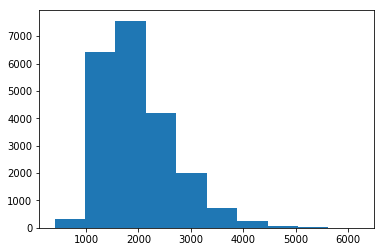

In [53]:
plt.hist(df['sqft_living15']);
#sqft_living 15 is continuous and positively skewed

In [54]:
df['scaled_sqft_living15'] = (df['sqft_living15'] - df['sqft_living15'].min()) / (df['sqft_living15'].max() - df['sqft_living15'].min())
df_model['scaled_sqft_living15'] = df['scaled_sqft_living15']
df_model = df_model.drop(labels = ['sqft_living15'], axis = 1)
#scaling sqft_living15 using min-max scaling

In [55]:
model_2 = sm.OLS(df['log_price'], df[['scaled_grade', 'scaled_sqft_living15']]).fit()
model_2.summary()
#adding sqft_living15 to model
#R^2 = 0.953
#R^2 has increased and all coefficents are signficant
#model has improved and so move onto next iteration

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 2.543e+05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:06:36   Log-Likelihood:                 23401.
No. Observations:               21529   AIC:                        -4.680e+04
Df Residuals:                   21527   BIC:                        -4.678e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
scaled_grade             0.7128      0.004    173.552      0.000       0.705       0.721
scaled_sqft_living15     0.1891      0.007     28.528      0.000       0.176       0.202
==============================================================================
Omnibus:                       55.214   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.183
Skew:                           0.109   Prob(JB):                     1.72e-12
Kurtosis:                       2.887   Cond. No.                         7.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

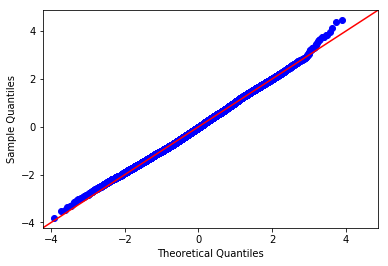

In [56]:
sm.graphics.qqplot(model_2.resid, line = '45', fit = True);
#checking distribution of residuals
#appears to be a slight skew so normality assumption is close to being violated

##### Adding third predictor to model

In [57]:
sqft_living15_corr = pd.DataFrame(df_model.corr().scaled_sqft_living15)
sqft_living15_corr.loc[sqft_living15_corr.scaled_sqft_living15 > 0.75].sort_values(by = 'scaled_sqft_living15', ascending = False).head()
#checking for colinearity between sqft_living15 and other predictors (using a 0.75 threshold)
#no other predictors appear to have a stong correlation with sqft_living15

,scaled_sqft_living15
scaled_sqft_living15,1.0


In [58]:
df_model = df_model.drop(labels = ['scaled_sqft_living15'], axis = 1)

In [59]:
pd.DataFrame(df_model.corr().log_price).sort_values(by = 'log_price', ascending = False).head()
#bathrooms has the greatest correlation with price

,log_price
log_price,1.000000
bathrooms,0.550675
lat,0.449442
bedrooms,0.350269
view,0.345269


In [60]:
df['scaled_bathrooms'] = (df['bathrooms'] - df['bathrooms'].min()) / (df['bathrooms'].max() - df['bathrooms'].min())
df_model['scaled_bathrooms'] = df['scaled_bathrooms']
df_model = df_model.drop(labels = ['bathrooms'], axis = 1)
#scaling bathrooms using min-max scaling

In [61]:
model_3 = sm.OLS(df['log_price'], df[['scaled_grade', 'scaled_sqft_living15', 'scaled_bathrooms']]).fit()
model_3.summary()
#adding bathrooms to model
#R^2 = 0.954
#R^2 has increased but only marginally so do not iterate further

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.706e+05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:06:37   Log-Likelihood:                 23470.
No. Observations:               21529   AIC:                        -4.693e+04
Df Residuals:                   21526   BIC:                        -4.691e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
scaled_grade             0.6823      0.005    140.752      0.000       0.673       0.692
scaled_sqft_living15     0.1728      0.007     25.577      0.000       0.160       0.186
scaled_bathrooms         0.0856      0.007     11.727      0.000       0.071       0.100
==============================================================================
Omnibus:                       77.219   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.392
Skew:                           0.123   Prob(JB):                     7.02e-17
Kurtosis:                       2.851   Cond. No.                         8.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

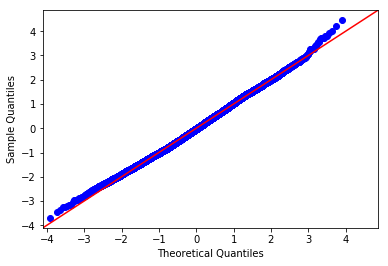

In [62]:
sm.graphics.qqplot(model_3.resid, line = '45', fit = True);
#checking distribution of residuals
#doesnt appear to have changed much from last iteration

#### Location model

In [63]:
mean_zipcodes = mean_zipcodes.reset_index()
cheap_zipcodes = mean_zipcodes.loc[mean_zipcodes['price_band'] == 'cheap', ['zipcode']]
expensive_zipcodes = mean_zipcodes.loc[mean_zipcodes['price_band'] == 'expensive', ['zipcode']]
cheap_df = df.merge(cheap_zipcodes, left_on='zipcode', right_on='zipcode', how='right')
expensive_df = df.merge(expensive_zipcodes, left_on='zipcode', right_on='zipcode', how='right')
#creating dataframes from cheap and expensive zipcodes

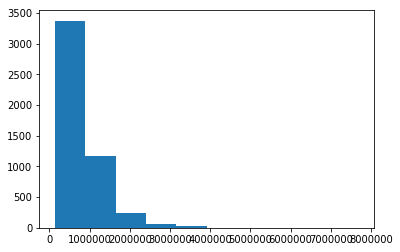

In [64]:
plt.hist(expensive_df['price']);
#response has a strong postive skew
#apply log transformation to improve normality

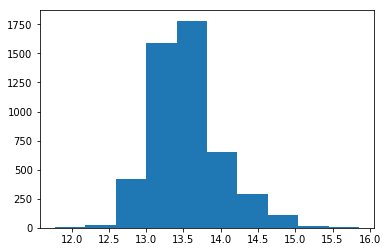

In [65]:
expensive_df['log_price'] = expensive_df['price'].map(lambda x: np.log(x))
plt.hist(expensive_df['log_price']);
#transformation has improved normality in response

In [66]:
expensive_df.drop(labels = ['price', 'scaled_grade', 'scaled_sqft_living15', 'scaled_bathrooms'], axis = 1, inplace = True)
pd.DataFrame(expensive_df.corr().log_price).sort_values(by = 'log_price', ascending = False).head()
#sqft_living has the greatest correlation with price

,log_price
log_price,1.000000
sqft_living,0.764497
grade,0.710697
sqft_above,0.662702
sqft_living15,0.630939


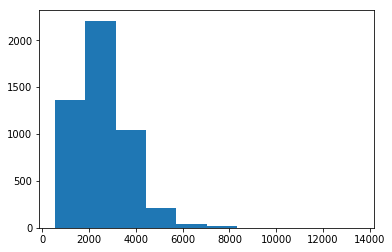

In [67]:
plt.hist(expensive_df['sqft_living']);
#sqft_living is continuous and positively skewed

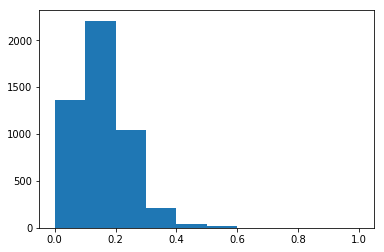

In [68]:
expensive_df['scaled_sqft_living'] = (expensive_df['sqft_living'] - expensive_df['sqft_living'].min()) / (expensive_df['sqft_living'].max() - expensive_df['sqft_living'].min())
plt.hist(expensive_df['scaled_sqft_living'])
expensive_df = expensive_df.drop(labels = ['sqft_living'], axis = 1)
#scaling sqft_living using min-max scaling

In [69]:
model_1a = sm.OLS(expensive_df['log_price'], expensive_df[['scaled_sqft_living']]).fit()
model_1a.summary()
#adding sqft_living to linear model
#R^2 = 0.792
#coefficent is significant
#model is valid so move onto next iteration

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 1.862e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:06:38   Log-Likelihood:                -15839.
No. Observations:                4888   AIC:                         3.168e+04
Df Residuals:                    4887   BIC:                         3.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
scaled_sqft_living    67.2431      0.493    136.462      0.000      66.277      68.209
==============================================================================
Omnibus:                     1606.180   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8826.527
Skew:                          -1.467   Prob(JB):                         0.00
Kurtosis:                       8.893   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

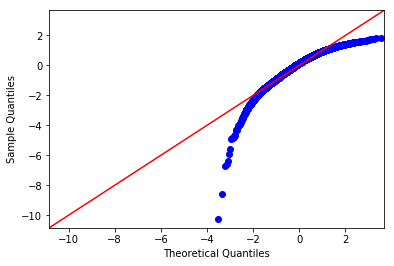

In [70]:
sm.graphics.qqplot(model_1a.resid, line = '45', fit = True);
#checking distribution of residuals
#appears to be strong skew so normality assumption has been violated